In [ ]:
'''
Project: Analyzing Stock Market Data

Objective: Analyze and visualize historical stock market data using NumPy,
pandas, and Matplotlib.

Modules Used:

NumPy: For numerical operations and data manipulation.
pandas: For data manipulation, analysis, and preprocessing.
Matplotlib: For data visualization and plotting.
Steps to Follow:

1.Data Acquisition: Choose a stock (e.g., Apple, Microsoft, Google) and 
collect historical stock market data. You can use online APIs 
(such as Alpha Vantage or Yahoo Finance) to fetch the data programmatically. Alternatively, 
you can download historical data from financial websites in CSV format.

2.Data Preprocessing: Use pandas to load and preprocess the data. Perform the following tasks:

Handle missing data, if any.
Convert the date column to a proper datetime format.
Clean up any unnecessary columns.
3.Data Analysis: Use NumPy and pandas to analyze the data and gain insights. 
Perform the following tasks:

Calculate basic statistics such as mean, median, standard deviation, and correlation.
Calculate daily returns and cumulative returns.
Explore rolling statistics, such as moving averages, to identify trends.
4.Data Visualization: Use Matplotlib to create visualizations and 
plots to better understand the data. Perform the following tasks:

Plot the stock's closing prices over time.
Create line plots for moving averages to visualize trends.
Plot the daily returns and cumulative returns over time.
Visualize the correlation between multiple stocks, if available.
5.Additional Analysis: (Optional) Extend your analysis by incorporating more advanced techniques.
Some ideas include:

Implementing trading strategies based on technical indicators (e.g., moving averages, Bollinger Bands).
Conducting hypothesis testing on stock returns or exploring predictive modeling using 
machine learning algorithms.
6.Documentation and Presentation: Document your code and findings in a clear and concise manner. 
Provide explanations, insights, and visualizations in a well-structured format. 
You can use Jupyter Notebook or any other suitable medium for this purpose.
'''

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('................Succesfully Run  !')

................Succesfully Run  !


In [8]:
import yfinance as yf

# Choose a stock symbol and set the start and end date for data retrieval
symbol = "TCS"
start_date = "2010-01-01"
end_date = "2022-12-31"

# Use yfinance to fetch the historical stock data
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [9]:
# Reset the index and keep only the necessary columns (e.g., "Date" and "Close")
data = data.reset_index()
data = data[["Date", "Close"]]

# Convert the "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"])
print('................Succesfully Run  !')

................Succesfully Run  !


In [10]:
# Calculate basic statistics
statistics = data["Close"].describe()

# Calculate daily returns and cumulative returns
data["Daily_Return"] = data["Close"].pct_change()
data["Cumulative_Return"] = (1 + data["Daily_Return"]).cumprod() - 1

# Explore rolling statistics (e.g., 30-day moving average)
data["Moving_Average"] = data["Close"].rolling(window=30).mean()
print('................Succesfully run !')

................Succesfully run !


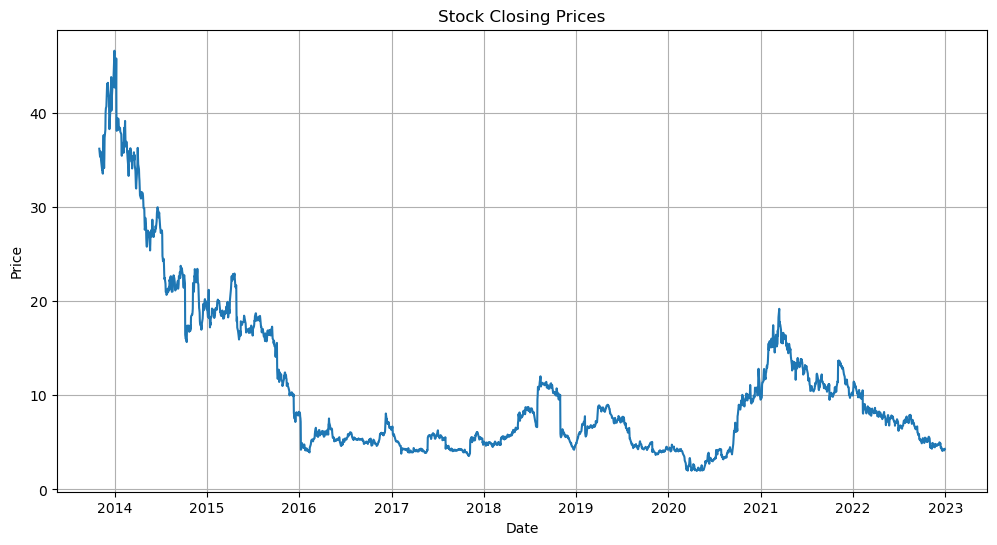

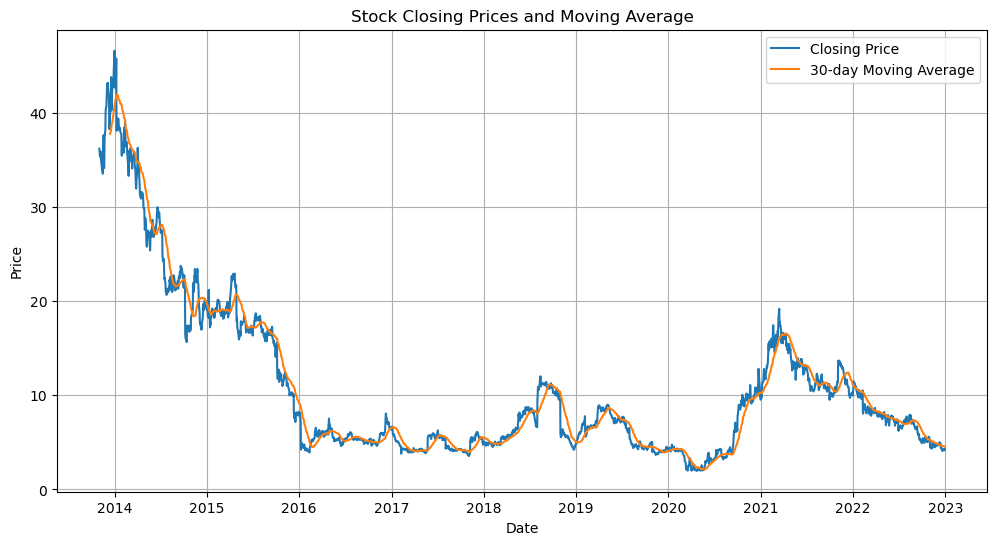

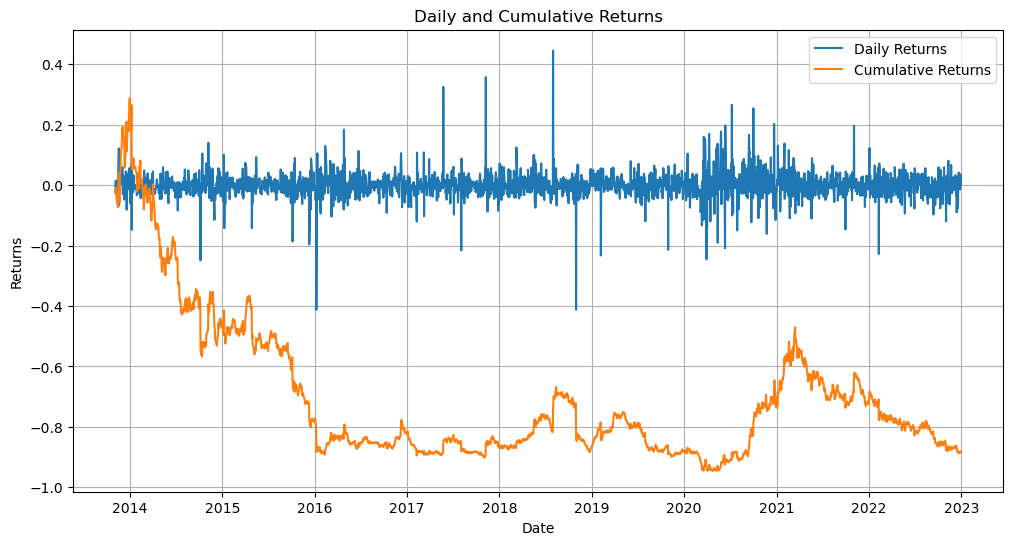

In [11]:
# Plot the stock's closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Close"])
plt.title("Stock Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Create line plots for moving averages to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Close"], label="Closing Price")
plt.plot(data["Date"], data["Moving_Average"], label="30-day Moving Average")
plt.title("Stock Closing Prices and Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

# Plot the daily returns and cumulative returns over time
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Daily_Return"], label="Daily Returns")
plt.plot(data["Date"], data["Cumulative_Return"], label="Cumulative Returns")
plt.title("Daily and Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.show()


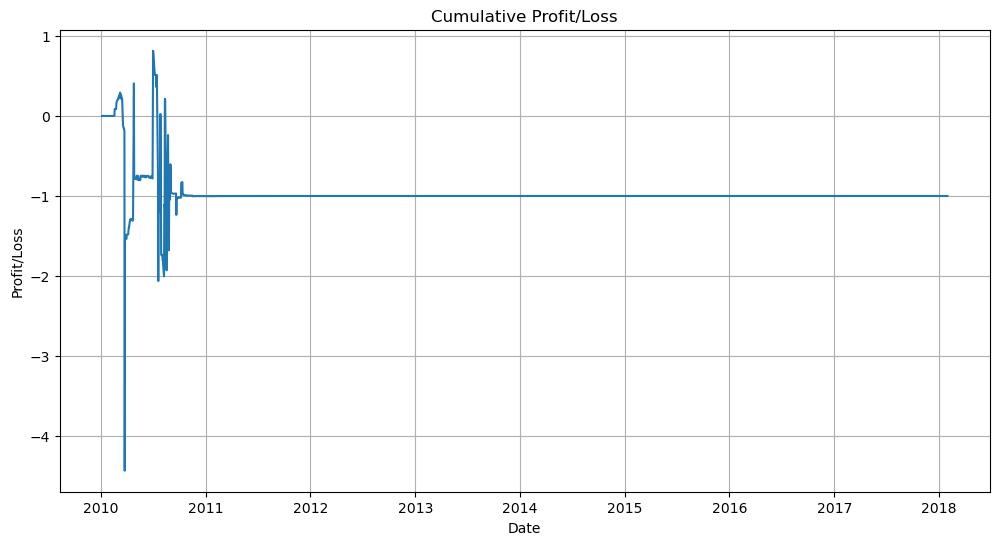

In [17]:
# Create a new column for the trading signals based on the moving averages
data["Signal"] = 0
data.loc[data["Moving_Average"] < data["Close"], "Signal"] = 1
data.loc[data["Moving_Average"] > data["Close"], "Signal"] = -1

# Calculate the daily profit/loss based on the trading signals
data["Profit/Loss"] = data["Signal"].shift() * data["Daily_Return"]

# Calculate the cumulative profit/loss
data["Cumulative_Profit/Loss"] = (1 + data["Profit/Loss"]).cumprod() - 1

# Plot the cumulative profit/loss
plt.figure(figsize=(12, 6))
plt.plot(data["Date"], data["Cumulative_Profit/Loss"])
plt.title("Cumulative Profit/Loss")
plt.xlabel("Date")
plt.ylabel("Profit/Loss")
plt.grid(True)
plt.show()
